# Seam Carving Implementation

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import scipy
import scipy.sparse.linalg
import ipywidgets as widgets
import utils

## Upload your own photo

In [2]:
# User TODO: Run this block and upload your own picture using the upload widget

pic_upload = widgets.FileUpload(accept="image/*", multiple=False)
pic_upload

FileUpload(value=(), accept='image/*', description='Upload')

In [3]:
pic_upload.value

({'name': 'las_vegas.png',
  'type': 'image/png',
  'size': 4512815,
  'content': <memory at 0x7f9113e65b80>,
  'last_modified': datetime.datetime(2023, 12, 4, 1, 11, 56, 642000, tzinfo=datetime.timezone.utc)},)

In [4]:
if len(pic_upload.value) == 1:
    content = pic_upload.value[0]['content'].tobytes()
    file_type = pic_upload.value[0]['type'].split('/')[1]
    file_name = pic_upload.value[0]['name'].replace(f'.{file_type}', '')

    np_array = np.frombuffer(content, np.uint8)
    original = cv2.cvtColor(cv2.imdecode(np_array, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
    running_im = np.copy(original)
else:
    print("Error: Please upload 1 picture")

## Set your own width and height

In [5]:
# User TODO: Choose your width %. Setting the value < 0 or > 100 will create undefined behavior.

desired_width = widgets.IntText(
    value=90,
    min=0,
    max=100,
    description='Width %:',
    disabled=False
)

desired_width

IntText(value=90, description='Width %:')

In [6]:
# User TODO: Choose your height %. Setting the value < 0 or > 100 will create undefined behavior.

desired_height = widgets.IntText(
    value=90,
    min=0,
    max=100,
    description='Height %:',
    disabled=False
)

desired_height

IntText(value=90, description='Height %:')

In [7]:
assert desired_width.value >= 0 and desired_width.value <= 100
assert desired_height.value >= 0 and desired_height.value <= 100

width_seams = round(np.shape(original)[1] * (100 - desired_width.value) * 0.01)
height_seams = round(np.shape(original)[0] * (100 - desired_height.value) * 0.01)

width_seams, height_seams

(555, 138)

## Find and Remove Seams

In [8]:
# User TODO: Set to True if you want to save each frame by frame, to later turn into a gif/video
should_save_frames = False

In [9]:
# Remove vertical seams

for i in range(width_seams):
    seam, width_energypaths = utils.findseam(running_im)
    
    if should_save_frames:
        utils.save_frame(running_im, seam, True, i)
    
    running_im = utils.removeseam(running_im,seam)

In [10]:
# Rotate image to get & remove horizontal seams

rot_im = np.rot90(running_im, 1)

for i in range(height_seams):
    seam, height_energypaths = utils.findseam(rot_im)
    
    if should_save_frames:
        utils.save_frame(rot_im, seam, False, i)
    
    rot_im = utils.removeseam(rot_im,seam)
    
running_im = np.rot90(rot_im, 3)

## View Results

True

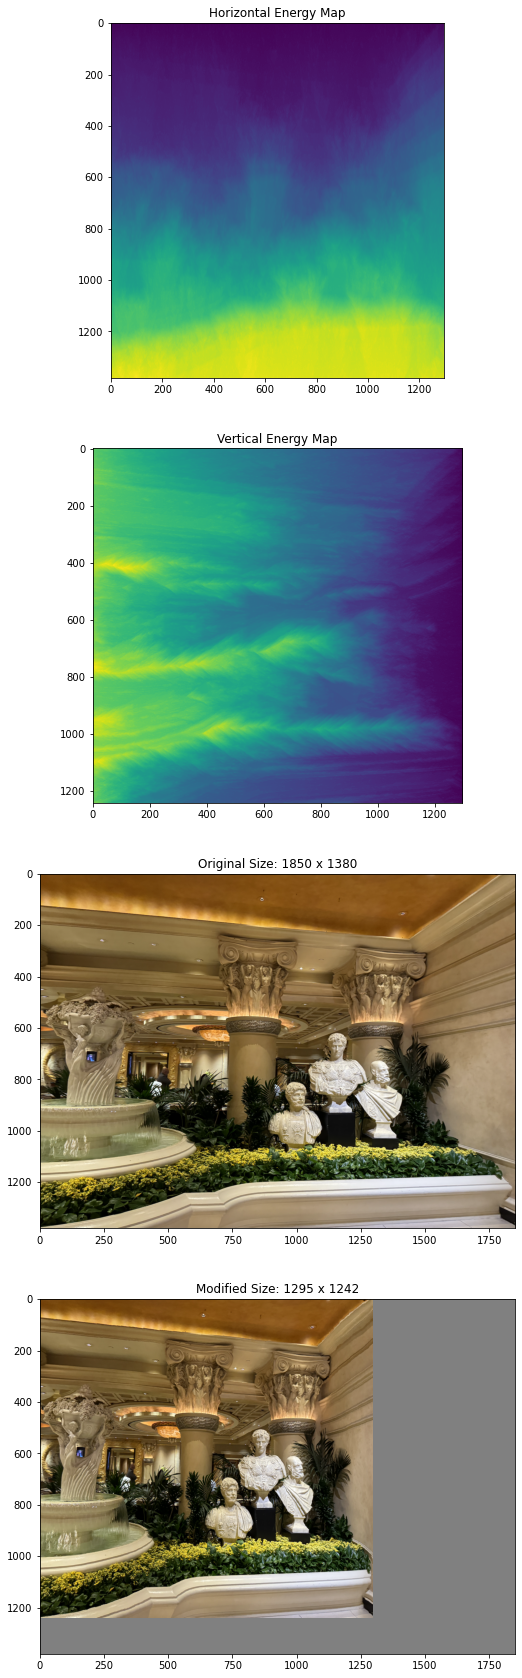

In [11]:
plt.figure(figsize=(10,30))
plt.subplot(4,1,1)
plt.imshow(width_energypaths)
plt.title('Horizontal Energy Map')

plt.subplot(4,1,2)
plt.imshow(np.rot90(height_energypaths,3))
plt.title('Vertical Energy Map')

plt.subplot(4,1,3)
plt.xlim(0, np.shape(original)[1])
plt.ylim(np.shape(original)[0], 0)
plt.imshow(original)
plt.title(f'Original Size: {np.shape(original)[1]} x {np.shape(original)[0]}')

plt.subplot(4,1,4,facecolor="gray")
plt.xlim(0, np.shape(original)[1])
plt.ylim(np.shape(original)[0], 0)
plt.imshow(running_im)
plt.title(f'Modified Size: {np.shape(running_im)[1]} x {np.shape(running_im)[0]}')

cv2.imwrite(f'images/outputs/{file_name}_output.png', cv2.cvtColor(running_im, cv2.COLOR_BGR2RGB))